In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("/Users/tjwilli/presentation.mplstyle")

In [2]:
def func(x):
    return x**2 * np.sin(x) + 5 

In [3]:
x = np.linspace(-3,3,1000)
y = func(x)

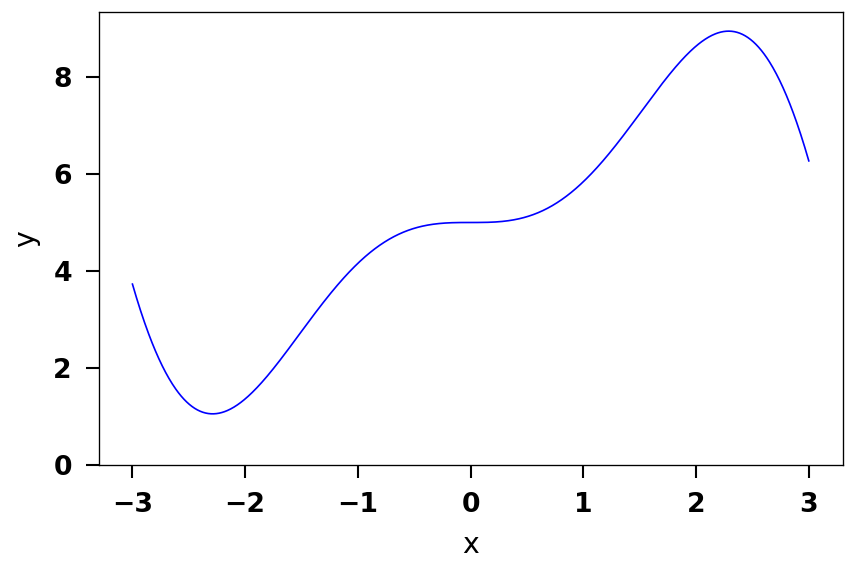

In [175]:
plt.plot(x,y,c='blue')
plt.ylim(0)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('complicated_function.pdf',bbox_inches='tight')

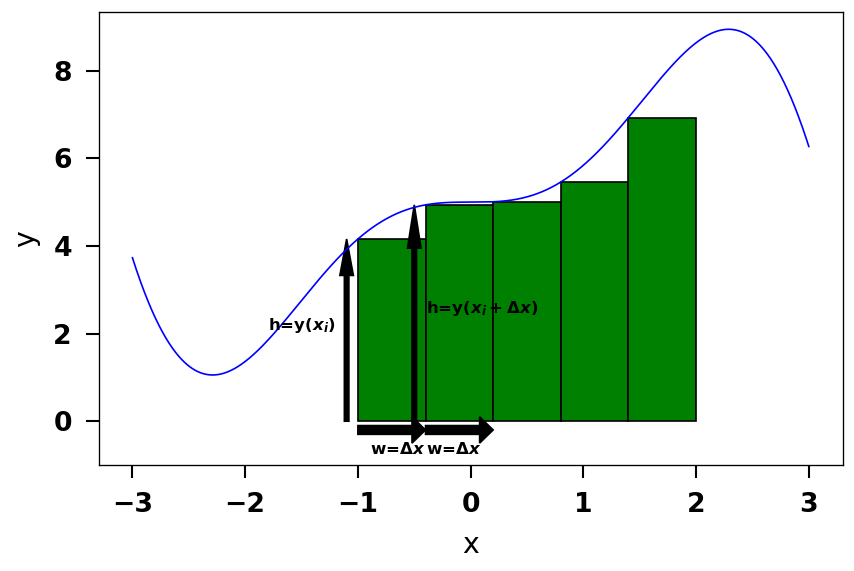

In [6]:
plt.plot(x,y,c='blue')
plt.ylim(-1)
plt.xlabel('x')
plt.ylabel('y')

rng = np.linspace(-1,2,6)
dx = np.diff(rng).max()
i = 0
for xx in rng[:-1]:
    if i<=100:
        plt.bar(xx,func(xx),width=dx,color='green',align='edge',edgecolor='k')
        if i==0:
            a=plt.Arrow(xx-0.1,0,0,func(xx),width=0.2,color='k')
            a2 = plt.Arrow(xx,-.2,dx,0,width=1,color='k')
            plt.gca().add_artist(a)
            plt.gca().add_artist(a2)
            plt.text(xx-0.2,func(xx)/2,"h=y({})".format(r'$x_i$'),ha='right')
            plt.text(xx+dx,-.45,r'w={}'.format(r'$\Delta x$'),va='top',ha='right')
        elif i==1:
            a=plt.Arrow(xx-0.1,0,0,func(xx),width=0.2,color='k')
            a2 = plt.Arrow(xx,-.2,dx,0,width=1,color='k')
            plt.gca().add_artist(a)
            plt.gca().add_artist(a2)
            plt.text(xx,func(xx)/2,"h=y({})".format(r'$x_i+\Delta x$'),ha='left')
            plt.text(xx,-.45,r'w={}'.format(r'$\Delta x$'),va='top',ha='left')
    i+=1
plt.savefig('reimann_3.pdf',bbox_inches='tight')

### Midpoint rule

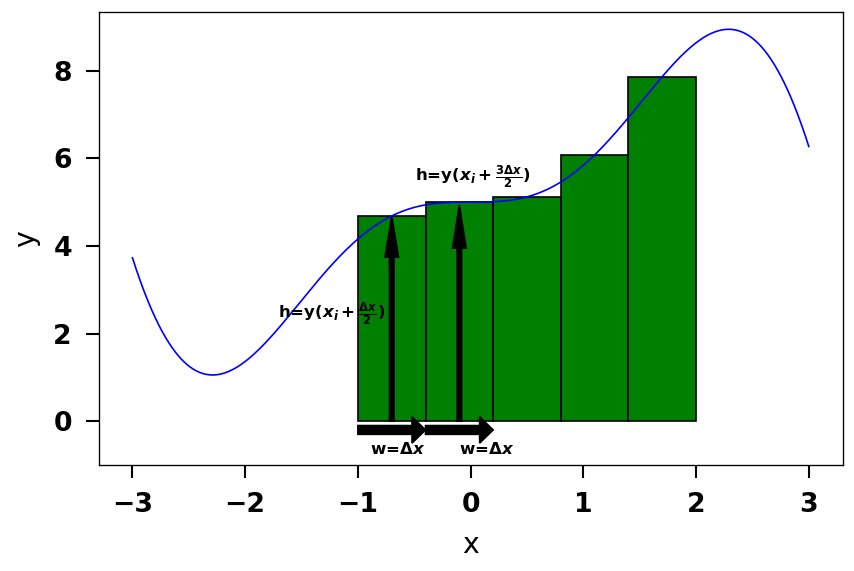

In [34]:
plt.plot(x,y,c='blue')
plt.ylim(-1)
plt.xlabel('x')
plt.ylabel('y')

rng = np.linspace(-1,2,6)
dx = np.diff(rng).max()
i = 0
for xx in rng[:-1]:
    if i<=100:
        plt.bar(xx,func(xx+dx/2),width=dx,color='green',align='edge',edgecolor='k')
        if i==0:
            a=plt.Arrow(xx+dx/2,0,0,func(xx+dx/2),width=0.2,color='k')
            a2 = plt.Arrow(xx,-.2,dx,0,width=1,color='k')
            plt.gca().add_artist(a)
            plt.gca().add_artist(a2)
            plt.text(xx+dx/2-0.1*dx,func(xx+dx/2)/2,"h=y({})".format(r'$x_i+\frac{\Delta x}{2}$'),ha='right')
            plt.text(xx+dx,-.45,r'w={}'.format(r'$\Delta x$'),va='top',ha='right')
        elif i==1:
            a=plt.Arrow(xx+dx/2,0,0,func(xx),width=0.2,color='k')
            a2 = plt.Arrow(xx,-.2,dx,0,width=1,color='k')
            plt.gca().add_artist(a)
            plt.gca().add_artist(a2)
            plt.text(xx+dx/2+dx*.2,func(xx+dx/2)*1.05,"h=y({})".format(r'$x_i+\frac{3\Delta x}{2}$'),ha='center',va='bottom')
            plt.text(xx+dx/2,-.45,r'w={}'.format(r'$\Delta x$'),va='top',ha='left')
    i+=1
plt.savefig('reimann_4.pdf',bbox_inches='tight')

In [264]:
def myfunc(x):
    return 2 * x

xi = 0
xf = 3
n = 10

dx = (xf - xi) / n
total = 0
for i in range(n):
    x = xi + i * dx
    y = myfunc(x)
    area = y * dx
    total += area
print(total)

8.1


# Projectile Motion

In [265]:
mass = 5 #kg
g = 9.81

def force(t):
    return -mass * g

ti = 0
tf = 5
n = 10

dt = (tf - ti) / n
total = 0
for i in range(n):
    t = ti + i * dt
    F = force(t)
    area = F * dt
    total += area
print(total)

-245.25000000000003


In [298]:
t = np.arange(0.1,100,0.1)
y = t**2 * np.exp(-t/10)
data = np.array([t,y]).T
np.savetxt("data.txt",data,header="X Y")

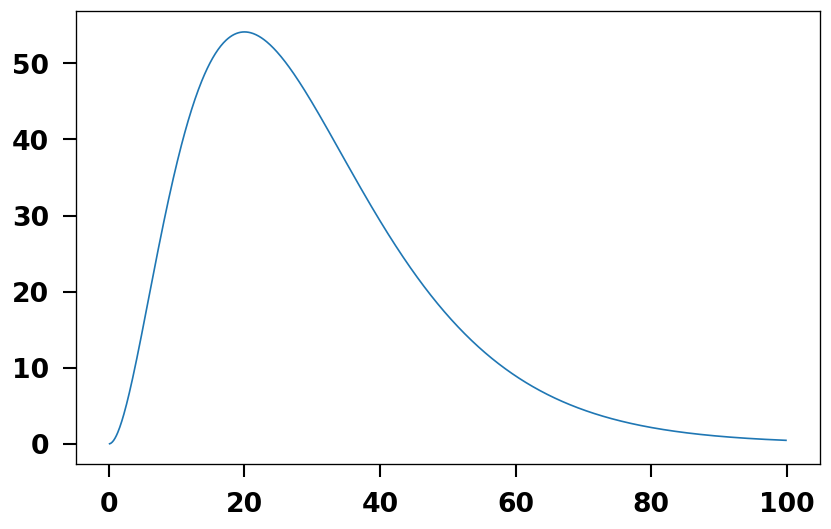

In [300]:
#Read and plot
infile = open("data.txt","r")
lines = infile.readlines()
infile.close()
x = []
y = []
for line in lines:
    if line.startswith('#') or len(line)==0:
        continue
    xval,yval = line.split()
    x.append(float(xval))
    y.append(float(yval))

plt.plot(x,y)

In [303]:
#Integrate

total = 0
for i in range(len(x)-1):
    h = y[i]
    dx = x[i+1] - x[i]
    area = h * dx
    total += area
print(area)

0.04613198617236504


0.04613198617236504

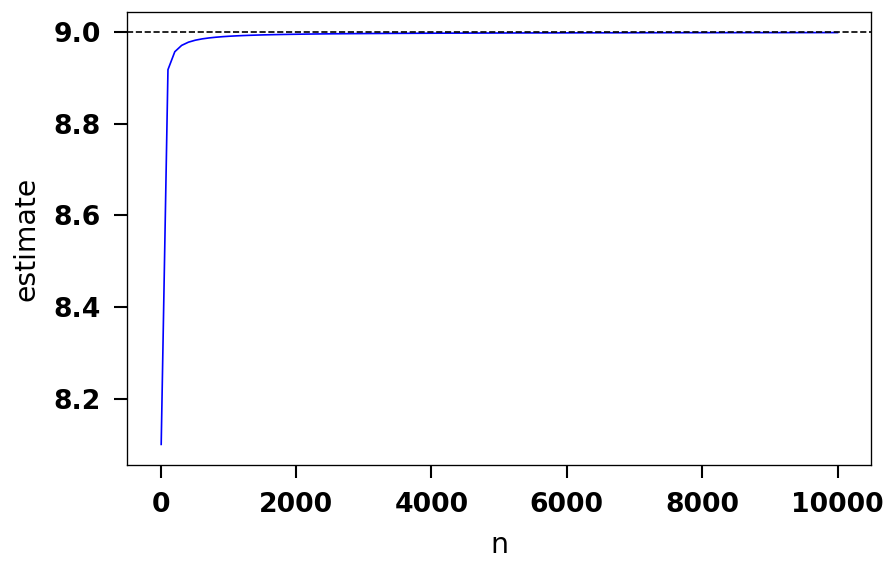

In [332]:
def myfunc(x):
    return 2 * x


def integrate(xi,xf,n):

    dx = (xf - xi) / n
    total = 0
    for i in range(n):
        x = xi + i * dx
        y = myfunc(x)
        area = y * dx
        total += area
    return total

n = np.linspace(10,10000,100,dtype=int)
estimate = []
for nn in n:
    estimate.append( integrate(0,3,nn) )
estimate = np.array(estimate)
plt.plot(n,estimate,c='blue')
plt.xlabel('n')
plt.ylabel('estimate')
plt.axhline(9,c='k',ls='--')
plt.savefig("error1.pdf",bbox_inches='tight')

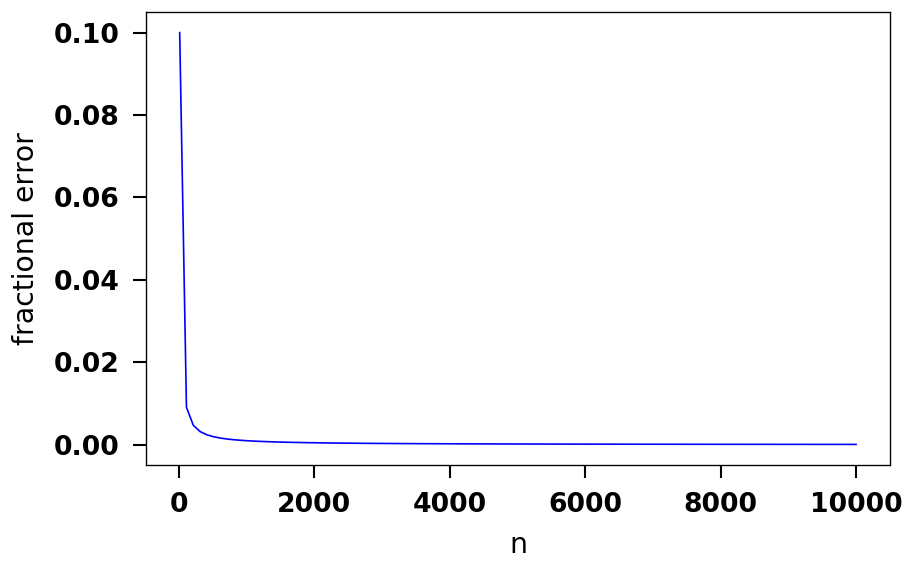

In [318]:
def myfunc(x):
    return 2 * x


def integrate(xi,xf,n):

    dx = (xf - xi) / n
    total = 0
    for i in range(n):
        x = xi + i * dx
        y = myfunc(x)
        area = y * dx
        total += area
    return total

n = np.linspace(10,10000,100,dtype=int)
estimate = []
for nn in n:
    estimate.append( integrate(0,3,nn) )
estimate = np.array(estimate)
plt.plot(n,np.abs(estimate-9)/9,c='blue')
plt.xlabel('n')
plt.ylabel('fractional error')
#plt.axhline(1,c='k',ls='--')
plt.savefig("error2.pdf",bbox_inches='tight')

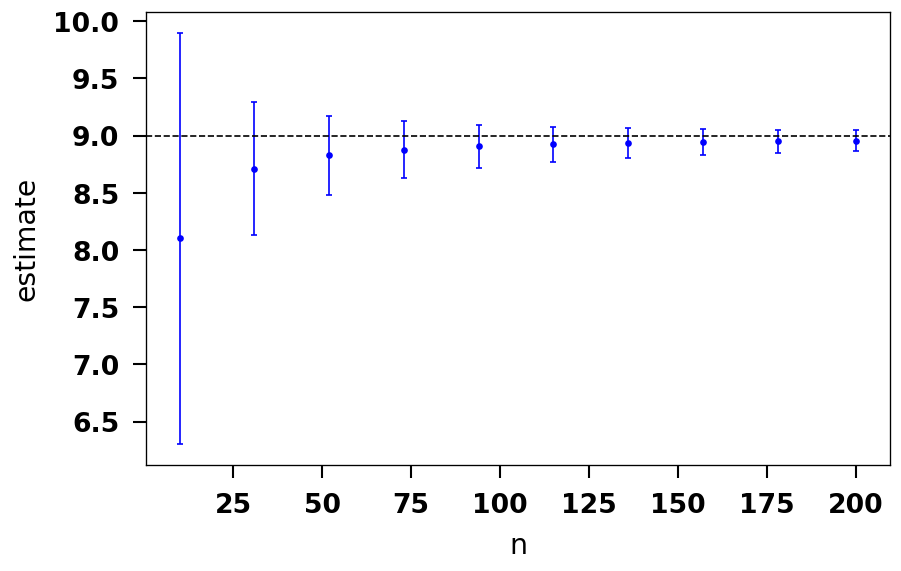

In [333]:
def myfunc(x):
    return 2 * x


def integrate(xi,xf,n):

    dx = (xf - xi) / n
    total = 0
    ymax = myfunc(xf)
    ymin = myfunc(xi)
    M = (ymax - ymin) / (xf-xi)
    error = M * (xf-xi)**2 / n
    for i in range(n):
        x = xi + i * dx
        y = myfunc(x)
        area = y * dx
        total += area
    return total,error

n = np.linspace(10,200,10,dtype=int)
estimate = []
uncert = []
for nn in n:
    result,error = integrate(0,3,nn)
    estimate.append( result )
    uncert.append( error )
estimate = np.array(estimate)
plt.errorbar(n,estimate,yerr=uncert,fmt='o',markersize=3,capsize=2,c='blue')
plt.xlabel('n')
plt.ylabel('estimate')
plt.axhline(9,c='k',ls='--')
plt.savefig("errorbars.pdf",bbox_inches='tight')

In [320]:
error

0.0018

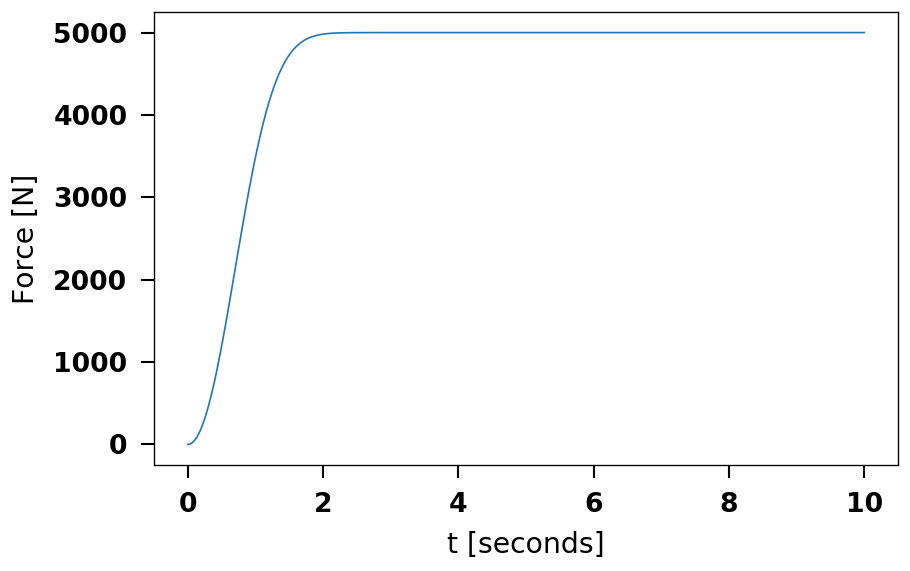

In [51]:
def force(t):
    return 5000*(1-np.exp(-t**3/5-t**2))
t = np.linspace(0,10,1000)
f = force(t)
plt.plot(t,f)
plt.xlabel("t [seconds]")
plt.ylabel("Force [N]")
plt.savefig('variable_force.pdf',bbox_inches='tight')

In [66]:
def force(t):
    return 5000*(1-np.exp(-t**3/5-t**2))


def integrate(ti,tf,n):

    dt = (tf - ti) / n
    total = 0
    for i in range(n):
        t = ti + i * dt
        f = force(t)
        area = f * dt
        total += area
    return total


n = 10
ti = 0
tf = 8
mass = 1100
pf = integrate(ti,tf,n)
vf = pf / mass
print(vf)

30.871841985418182


In [4]:
def force(t):
    return 5000*(1-np.exp(-t**3/5-t**2))

mcar = 1100
ti = 0
tf = 8
n = 10

dt = (tf - ti) / n
total = 0
for i in range(n):
    t = ti + i * dt
    f = force(t)
    area = f * dt
    total += area

pfinal = total
vfinal = pfinal / mcar
print(vfinal)

30.871841985418182


In [6]:
def force(t):
    return 5000*(1-np.exp(-t**3/5-t**2))

def calc_uncertainty(xi,xf,M,n):
    """We need to find M somehow?"""
    return 0.5 * M * (xf-xi)**2 / n

mcar = 1100
ti = 0
tf = 8
n = 10

dt = (tf - ti) / n
total = 0
for i in range(n):
    t = ti + i * dt
    f = force(t)
    area = f * dt
    total += area

pfinal = total
vfinal = pfinal / mcar
print(vfinal)

30.871841985418182


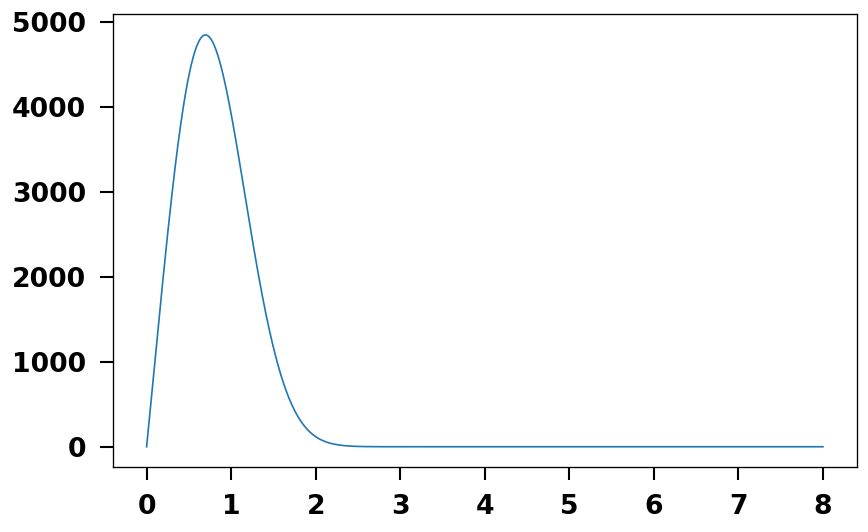

In [9]:
"""Plot F'(t)"""
def force_deriv(t):
    return 5000*(0.6*t**2+2*t)*np.exp(-t**3/5-t**2)
t = np.linspace(0,8,1000)
dfdt = force_deriv(t)
plt.plot(t,dfdt)

4845.068758385285


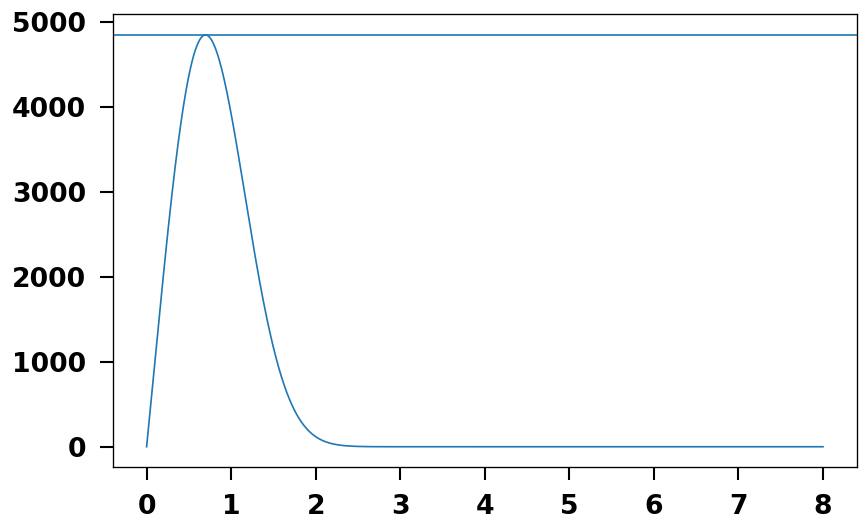

In [12]:
"""Plot F'(t)"""
def force_deriv(t):
    return 5000*(0.6*t**2+2*t)*np.exp(-t**3/5-t**2)
t = np.linspace(0,8,100000)
dfdt = force_deriv(t)
plt.plot(t,dfdt)
M = dfdt.max()
plt.axhline(ftmax)
print(ftmax)

In [18]:
def force(t):
    return 5000*(1-np.exp(-t**3/5-t**2))

def force_deriv(t):
    return 5000*(0.6*t**2+2*t)*np.exp(-t**3/5-t**2)

def calc_uncertainty(xi,xf,M,n):
    """We need to find M somehow?"""
    return 0.5 * M * (xf-xi)**2 / n

mcar = 1100
ti = 0
tf = 8
n = 100
t = np.linspace(ti,tf,10000)
dfdt = force_deriv(t)
M = dfdt.max()

dt = (tf - ti) / n
total = 0
for i in range(n):
    t = ti + i * dt
    f = force(t)
    area = f * dt
    total += area

pfinal = total
pfinal_uncert = calc_uncertainty(ti,tf,M,n)
vfinal = pfinal / mcar
vfinal_uncert = pfinal_uncert / mcar
print('The speed after {} seconds is {}+-{}'.format(tf-ti,vfinal,vfinal_uncert))

The speed after 8 seconds is 32.503520281153996+-1.4094739998592314


In [19]:
#Putting it all together

In [20]:
def func(x):
    pass

def deriv(x):
    pass

def calc_uncertainty(xi,xf,n):
    """We need to find M somehow?"""
    x = np.linspace(xi,xf,10000)
    dydx = deriv(x)
    M = dydx.max()
    return 0.5 * M * (xf-xi)**2 / n

def integrate(xi,xf,n):
    #First get estimate
    dx = (xf - xi) / n
    total = 0
    for i in range(n):
        x = xi + i * dx
        f = func(x)
        area = f * dx
        total += area
    
    #Now get uncertainty
    uncert = calc_uncertainty(xi,xf,n)
    return total,uncert

Text(0, 0.5, 'A_est')

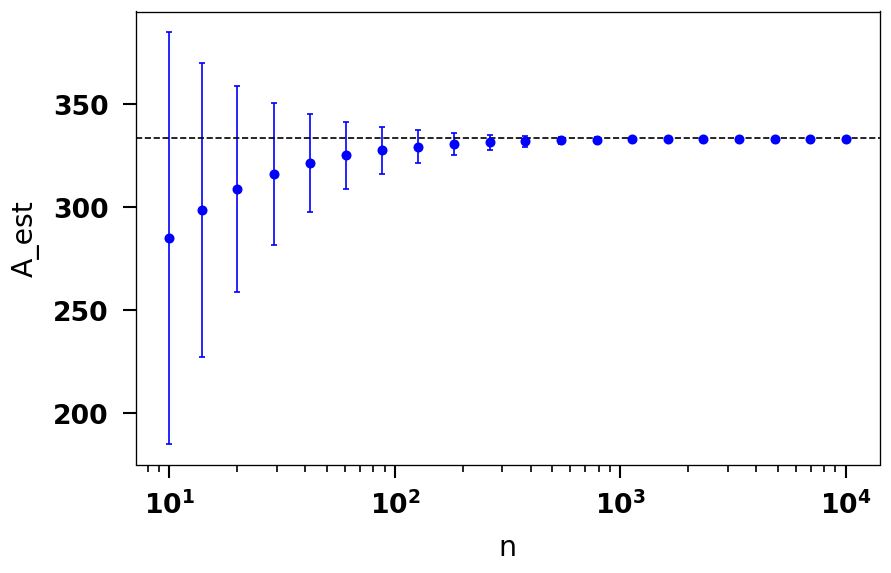

In [41]:
def func(x):
    return x**2

def deriv(x):
    return 2*x

def calc_uncertainty(xi,xf,n):
    """We need to find M somehow?"""
    x = np.linspace(xi,xf,10000)
    dydx = deriv(x)
    M = dydx.max()
    return 0.5 * M * (xf-xi)**2 / n

def integrate(xi,xf,n):
    #First get estimate
    dx = (xf - xi) / n
    total = 0
    for i in range(n):
        x = xi + i * dx
        f = func(x)
        area = f * dx
        total += area
    
    #Now get uncertainty
    uncert = calc_uncertainty(xi,xf,n)
    return total,uncert

nvals = np.logspace(1,4,20,dtype=int) #10**np.linspace(1,4,50)
avals = []
davals = []
for n in nvals:
    a,da = integrate(0,10,n)
    avals.append(a)
    davals.append(da)

atrue = 1/3 * 10**3
plt.errorbar(nvals,avals,yerr=davals,fmt='o',color='blue',capsize=2)
plt.xscale('log')
plt.axhline(atrue,c='k',ls='--')
plt.xlabel('n')
plt.ylabel('A_est')

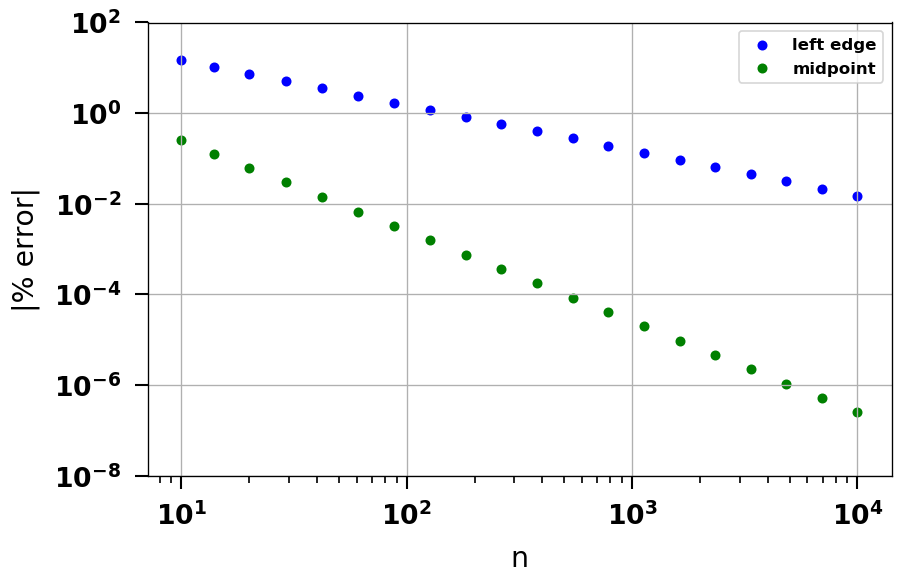

In [25]:
def func(x):
    return x**2

def deriv(x):
    return 2*x

def calc_uncertainty(xi,xf,n):
    """We need to find M somehow?"""
    x = np.linspace(xi,xf,10000)
    dydx = deriv(x)
    M = dydx.max()
    return 0.5 * M * (xf-xi)**2 / n

def integrate_midpoint(xi,xf,n):
    #First get estimate
    dx = (xf - xi) / n
    total = 0
    for i in range(n):
        x = xi + (i+1/2) * dx
        f = func(x)
        area = f * dx
        total += area
    return total


def integrate(xi,xf,n):
    #First get estimate
    dx = (xf - xi) / n
    total = 0
    for i in range(n):
        x = xi + i * dx
        f = func(x)
        area = f * dx
        total += area
    
    #Now get uncertainty
    uncert = calc_uncertainty(xi,xf,n)
    return total,uncert

nvals = np.logspace(1,4,20,dtype=int) #10**np.linspace(1,4,50)
vals_left = []
vals_mid = []
#davals = []
for n in nvals:
    yleft,dyleft = integrate(0,10,n)
    ymid = integrate_midpoint(0,10,n)
    vals_left.append(yleft)
    vals_mid.append(ymid)

vals_left = np.array(vals_left)
vals_mid = np.array(vals_mid)
atrue = 1/3 * 10**3
plt.scatter(nvals,100*np.abs(vals_left-atrue)/atrue,c='blue',label='left edge')
plt.scatter(nvals,100*np.abs(vals_mid-atrue)/atrue,c='green',label='midpoint')
plt.xscale('log')
plt.yscale('log')
#plt.axhline(atrue,c='k',ls='--')
plt.ylim(1e-8,100)
#plt.xlim(1,1e5)
plt.xlabel('n')
plt.ylabel('|% error|')
plt.legend()
plt.grid()
plt.savefig('left_vs_mid.pdf',bbox_inches='tight')

In [23]:
nvals

array([   10,    14,    20,    29,    42,    61,    88,   127,   183,
         263,   379,   545,   784,  1128,  1623,  2335,  3359,  4832,
        6951, 10000])